## Importing Relevant libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


## Loading data

In [37]:
diabetes_df = pd.read_csv ("diabetes.csv") 

In [38]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Descriptive Statistics

In [39]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Column Name                         | Description                                                                 |
|-------------------------------------|-----------------------------------------------------------------------------|
| Pregnancies  | This represents the number of times the patient has been pregnant|
| Glucose      | Plasma glucose concentration a 2 hours in an oral glucose tolerance test |
| BloodPressure | Diastolic Blood pressure |
| SkinThickness | Triceps skin fold thickness (mm)  |
| Insulin   |2-Hour serum insulin (mu U/ml)|
| BMI | Body mass index (weight in kg/(height in m)^2) |
| Diabetes pedigree function  | A component of the GCS that evaluates a patient’s verbal response, indicating their level of consciousness. |
| Age   | Age (years) |
| Outcome | Class variable (0 or 1)|

In [40]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [41]:
diabetes_df['Outcome'].describe()

count    768.000000
mean       0.348958
std        0.476951
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

**Pregnancies:**
- Number of records: 768
- Has a maximum value of 17 and a minimum value of 0
- The mean is greater than the median hence the is data is experiencing skewness
- The values fall between 0(the minimum) and 17(maximum) anything above or below it can be regarded as an outlier
- On average, the women in the dataset have had about 3.85 pregnancies.
- The mean > median(50%), thus implying a slight skew to the right, which is represented by the standard deviation also
- The minimum number of pregnancies in the dataset is 0 while the maximum is 17. Thus some women experienced high number of pregnancies

**Glucose:**
- Number of records: 768
- Has a maximum value of 199 and a minimum value of 0
- The mean is less than the median hence the is data is experiencing skewness
- The values fall between 0(the minimum) and 199(maximum) anything above or below it can be regarded as an outlier
- On average, the glucose levels are at 120.8
- The mean < median(50%), thus implying a slight skew to the left, which is represented by the standard deviation also
- The minimum glucose level in the dataset is 0 while the maximum is 199. Thus some women less quantities of glucose

**BloodPressure:** 
- Has 768 data points which is equivalent to the number of rows thus implying no missing values
- On average blood pressure for the women in the dataset is about 69.105.
- The mean< median(50%), thus implying a slight skew to the left, which is represented by the standard deviation also
- The minimum number blood pressure in the dataset is 0 while the maximum is 122.

**SkinThickness:**
- Has 768 data points which is equivalent to the number of rows thus implying no missing values
- On average skin thickness for the women in the dataset is about 20.53.
- The mean< median(50%), thus implying a slight skew to the left, which is represented by the standard deviation also
- The minimum skin thickness in the dataset is 0 while the maximum is 99.

**Insulin:**
- Number of records: 768
- Has a maximum value of 846 and a minimum value of 0
- The mean is greater than the median hence the is data is experiencing skewness
- The values fall between 0(the minimum) and 846(maximum) anything above or below it can be regarded as an outlier
- On average, the insulin levels in the dataset were at 79.8
- The mean > median(50%), thus implying a slight skew to the right, which is represented by the standard deviation also
- The minimum insulin level measurement in the dataset is 0 while the maximum is 846. Thus some women experienced high levels of insulin

**BMI:**
- Has 768 data points which is equivalent to the number of rows thus implying no missing values
- On average BMI for the women in the dataset is about 31.99.
- The mean is slightly less than median(50%), thus implying a slight skew to the left, which is represented by the standard deviation also
- The minimum BMI in the dataset is 0 while the maximum is 67.10.   

**DiabetesPedigreeFunction:**
- Has 768 data points which is equivalent to the number of rows thus i
- On average DiabetesPedigree Function for the women in the dataset is about 0.47.
- The mean is greater than median(50%), thus implying the variable is skewed to the right, which is represented by the standard deviation also.
- The minimum DiabetesPedigree Function in the dataset is 0.078 while the maximum is 2.42.

**Age:**
- Number of records: 768
- Has a maximum value of 81 and a minimum value of 21
- The mean is greater than the median hence the is data is experiencing skewness
- The values fall between 21(the minimum) and 81(maximum) anything above or below it can be regarded as an outlier
- On average, the age in the dataset were at 33.2
- The mean > median(50%), thus implying a slight skew to the right, which is represented by the standard deviation also
- The minimum age in the dataset is 21 while the maximum is 81. Thus the largest age group fall in older group


**Outcome:**
- Number of records: 768
- Has a maximum value of 1 and a minimum value of 0
- The mean is greater than the median hence the is data is experiencing skewness
- The values fall between 0(the minimum) and 1(maximum) anything above or below it can be regarded as an outlier
- On average, the outcome fall at 0.35.
- The mean > median(50%), thus implying a slight skew to the right, which is represented by the standard deviation also
- The minimum number of outcomes in the dataset is 0 while the maximum is 1

## Splitting the dataset into train and test

In [42]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [43]:
X = diabetes_df.drop(columns='Outcome')
y = diabetes_df['Outcome']

X_train , X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=42)

## Transformation & Normalization

In [44]:
# combining the dfs
df_train=pd.concat([X_train,y_train],axis=1)
df_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
60,2,84,0,0,0,0.0,0.304,21,0
618,9,112,82,24,0,28.2,1.282,50,1
346,1,139,46,19,83,28.7,0.654,22,0
294,0,161,50,0,0,21.9,0.254,65,0
231,6,134,80,37,370,46.2,0.238,46,1


In [45]:
df_test=pd.concat([X_test,y_test],axis=1)
df_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
668,6,98,58,33,190,34.0,0.430,43,0
324,2,112,75,32,0,35.7,0.148,21,0
624,2,108,64,0,0,30.8,0.158,21,0
690,8,107,80,0,0,24.6,0.856,34,0
473,7,136,90,0,0,29.9,0.210,50,0


In [46]:
train_label = np . asarray ( df_train["Outcome"])
train_data = np . asarray ( df_train.iloc [:,0:8])
test_label = np . asarray ( df_test["Outcome"])
test_data = np . asarray ( df_test.iloc [:,0:8])
means = np . mean ( train_data , axis =0 )
stds = np . std ( train_data , axis =0 )
train_data = ( train_data - means )/ stds
test_data = ( test_data - means )/ stds

## Create the model

In [47]:
model = LogisticRegression ()
model.fit(train_data , train_label )

LogisticRegression()

## Model Evaluation

In [48]:
accuracy = model.score ( test_data , test_label )
print (" accuracy = ", accuracy * 100 , "%")

 accuracy =  75.32467532467533 %


# Questions

1. Analyze the data in the dataframe and briefly present your most relevant conclusions.


**Question 2:** In which cases is it appropriate to use less than 20% of the data, and why?

**sln**
It is common to use 80% of the data for training and hold out 20%
for testing. However, this depends on the size of the dataset: if it
contains 10 million instances, then holding out 1% means your test
set will contain 100,000 instances: that’s probably more than
enough to get a good estimate of the generalization error.

**Question 3:** Check that the input data, trainData and testData, are normalized, indicating the Python code used for this. Why shouldn’t we normalize the trainLabel and testLabel sets?

**Question 4:** Once the model has been evaluated, can you comment on what you think of the metrics used and the result obtained taking into account the nature of the dataframe considered?


## Exercise 2. Metrics

In this second exercise, we will aim to correctly interpret the different metrics used to evaluate a model. First, we will show how to represent the ROC Curve for the case of logistic regression in Python. Recall that the ROC curve is the result of varying the detection threshold (classification). In our case, since the ”Outcome” attribute is equal to 1 for a patient with a positive diabetes diagnosis, increasing the detection threshold means reducing both the detection probability and the false alarm
probability.


c:\Users\josep\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


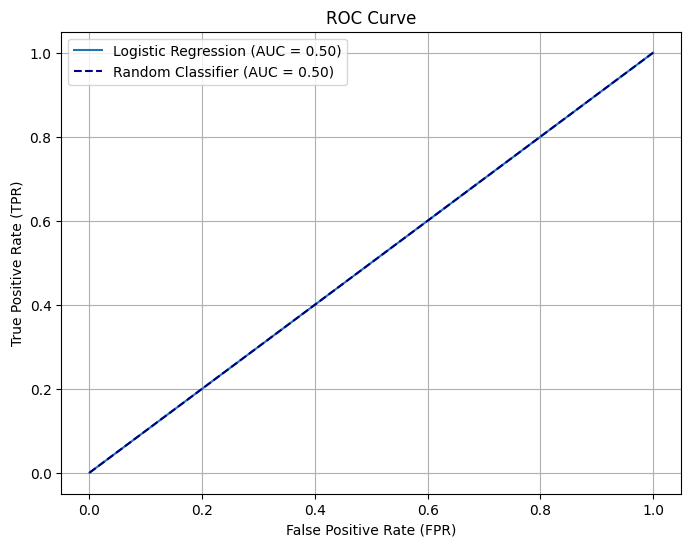

In [51]:
# Predict probabilities for the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

From the ROC curve generated, both the Logistic Regression and the random classifier are overlapping, and both have an Area Under the Curve (AUC) of 0.50. This indicates that the classifier is performing no better than random guessing.

Choosing a high or low threshold will not significantly change the model's performance, as the True Positive Rate (TPR) and False Positive Rate (FPR) will stay close to random (around 50%).

### Question 6: Fill in the following table for different probability threshold values.


In [55]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
thresholds = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
results = []

for threshold in thresholds:
    y_pred_thresh = (y_pred_prob >= threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred_thresh)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_thresh).ravel()
    sensitivity = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    tpr = sensitivity
    fpr = fp / (fp + tn)
    results.append([threshold, accuracy, sensitivity, f1, tpr, fpr])

columns = ['Threshold', 'Accuracy', 'Sensitivity', 'F1 Score', 'TPR', 'FPR']
df_results = pd.DataFrame(results, columns=columns)
df_results

c:\Users\josep\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,Threshold,Accuracy,Sensitivity,F1 Score,TPR,FPR
0,0.0,0.357143,1.0,0.526316,1.0,1.0
1,0.2,0.357143,1.0,0.526316,1.0,1.0
2,0.4,0.357143,1.0,0.526316,1.0,1.0
3,0.6,0.357143,1.0,0.526316,1.0,1.0
4,0.8,0.357143,1.0,0.526316,1.0,1.0
5,1.0,0.357143,1.0,0.526316,1.0,1.0


### Question 7: What do you observe in the extreme cases when the threshold is 0 or 1?


**Threshold = 0:**

- Accuracy: The accuracy remains low (0.357), indicating the model is not correctly predicting many of the actual outcomes.

- Sensitivity (True Positive Rate or TPR): Sensitivity is 1.0, meaning the model predicts all instances as positive (it identifies all actual positives, but this also includes a high number of false positives).

- F1 Score: The F1 Score is 0.526, which reflects the balance between precision and recall (in this case, recall is perfect, but precision is likely low due to many false positives).

- 
False Positive Rate (FPR): The FPR is 1.0, meaning every negative instance is classified incorrectly as positive.
This suggests that with a threshold of 0, the model is over-predicting positives and misclassifies all negatives.

**Threshold = 1:**

The model's performance metrics are identical across both extreme thresholds, meaning: 

- Sensitivity (TPR) = 1.0: It still predicts all instances as positives (even with a high threshold).

- FPR = 1.0: All negatives are still misclassified as positives.

The performance does not change from a threshold of 0 to 1, which may suggest a problem with the model, such as it being biased or not well-calibrated to adjust predictions based on the threshold.

### Question 8: What do the metrics of Sensitivity and Recall contribute compared to Accuracy?

**Sensitivity (Recall) = 1.0 for all thresholds:**

- The model is capturing all positive instances across all thresholds. This means that every positive instance is being classified correctly. However, this doesn’t tell the full story, because the other metrics reveal that the model is likely over-predicting the positive class.

**Accuracy remains constant at 0.357 (35.7%):**

- The model’s accuracy is quite low across all thresholds. Since sensitivity is 1.0 but accuracy is only 0.357, this suggests that the model is misclassifying most of the negative instances as positive.This low accuracy is a sign that the model is likely heavily biased toward the positive class.

**F1 Score = 0.526 across all thresholds:**

- The F1 score balances precision and recall. While recall (sensitivity) is perfect, the F1 score indicates that precision is much lower (because precision accounts for false positives).
The F1 score being around 0.526 suggests that the model is predicting many false positives, meaning it is predicting "positive" when the true label is "negative."

**TPR (True Positive Rate) = 1.0, FPR (False Positive Rate) = 1.0:**

- TPR (Sensitivity) being 1.0 confirms that the model correctly identifies all actual positives. FPR (False Positive Rate) being 1.0 means that the model is misclassifying all negative instances as positive, which is why accuracy remains low.